In [1]:
import os,sys
%matplotlib inline
import matplotlib.pylab as plt
import pickle
import numpy as np
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi']=300
sys.path.append(os.path.expanduser("~/Projects/Github/PyComplexHeatmap"))
import PyComplexHeatmap
print(PyComplexHeatmap.__version__)
from PyComplexHeatmap import *

1.7.7.dev0+gddb18da.d20240909


In [2]:
#set font to Arial using the following code
plt.rcParams['font.family']='sans serif'
plt.rcParams['font.sans-serif']='Arial'
# set pdf.fonttype to 42
plt.rcParams['pdf.fonttype']=42

## A quick example

Starting..
Calculating row orders..
Reordering rows..
Calculating col orders..
Reordering cols..
Plotting matrix..
Plotting HeatmapAnnotations
Plotting legends..
Estimated legend width: 19.051388888888887 mm


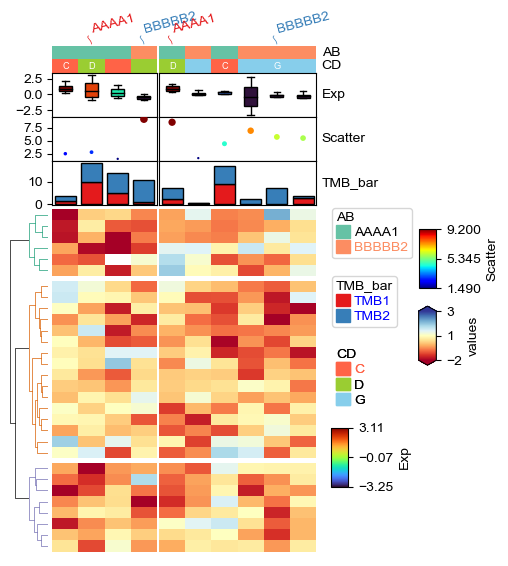

In [3]:
#Generate example dataset (random)
df = pd.DataFrame(['AAAA1'] * 5 + ['BBBBB2'] * 5, columns=['AB'])
df['CD'] = ['C'] * 3 + ['D'] * 3 + ['G'] * 4
df['EF'] = ['E'] * 6 + ['F'] * 2 + ['H'] * 2
df['F'] = np.random.normal(0, 1, 10)
df.index = ['sample' + str(i) for i in range(1, df.shape[0] + 1)]
df_box = pd.DataFrame(np.random.randn(10, 4), columns=['Gene' + str(i) for i in range(1, 5)])
df_box.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar = pd.DataFrame(np.random.uniform(0, 10, (10, 2)), columns=['TMB1', 'TMB2'])
df_bar.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_scatter = pd.DataFrame(np.random.uniform(0, 10, 10), columns=['Scatter'])
df_scatter.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_heatmap = pd.DataFrame(np.random.randn(30, 10), columns=['sample' + str(i) for i in range(1, 11)])
df_heatmap.index = ["Fea" + str(i) for i in range(1, df_heatmap.shape[0] + 1)]
df_heatmap.iloc[1, 2] = np.nan

plt.figure(figsize=(4, 6))
col_ha = HeatmapAnnotation(label=anno_label(df.AB, merge=True,rotation=15),
                           AB=anno_simple(df.AB,cmap='Set2'),axis=1,
                           CD=anno_simple(df.CD,add_text=True,colors={'C':'tomato','D':'yellowgreen','G':'skyblue'},
                                            legend_kws={'frameon':False}),
                           Exp=anno_boxplot(df_box, cmap='turbo',height=10),
                           Scatter=anno_scatterplot(df_scatter,height=10), 
                           TMB_bar=anno_barplot(df_bar,height=10,legend_kws={'color_text':False,'labelcolor':'blue'}))
cm = ClusterMapPlotter(data=df_heatmap, top_annotation=col_ha, col_split=2, row_split=3, col_split_gap=0.5,
                     row_split_gap=1,label='values',row_dendrogram=True,show_rownames=False,show_colnames=False,
                     tree_kws={'row_cmap': 'Dark2'},cmap='RdYlBu',
                       legend_kws=dict(extend='both',extendfrac=0.1,
                                       #boundaries=[-2,0,1,2,3],ticks=[-2,0,1,2,3]
                                      ),
                       legend_gap=5,legend_hpad=2,legend_vpad=5,vmin=-2,vmax=3,center=1) #
#legend_gap is the gap between two legends, legend_hpad is the horizonal space between legend and heatmap, legend_vpad
# is the verticall space between the first legend and the top of axes (legend_anchor).
# cm.ax_heatmap.set_axis_off()
plt.show()

## Plotting annotations

### Only plot the row/column annotation

Plotting HeatmapAnnotations


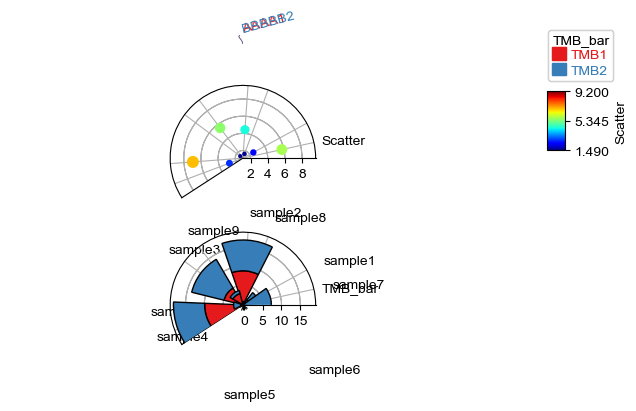

In [6]:
plt.figure(figsize=(6, 4))
col_ha = HeatmapAnnotation(label=anno_label(df.AB, merge=True,rotation=15),
                            # AB=anno_simple(df.AB,add_text=True,legend=True,cmap='Dark2'), axis=1,
                            # CD=anno_simple(df.CD, colors={'C': 'red', 'D': 'gray', 'G': 'yellow'},
                            #                add_text=True,legend=True),
                            # Exp=anno_boxplot(df_box, cmap='turbo',legend=True),
                            Scatter=anno_scatterplot(df_scatter), TMB_bar=anno_barplot(df_bar,legend=True),
                           plot=True,legend=True,legend_gap=3,projection='polar')
col_ha.show_ticklabels(df.index.tolist())
plt.show()